In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv(r"E:\Jupyter Notebooks\train.csv")

In [106]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
df['number'] = df['SibSp'] + df['Parch']

In [108]:
# creating a mixed variable to understand how to handle
df['number'].replace(0,'A',inplace = True)

In [109]:
df = df[['Cabin', 'Ticket', 'Survived', 'number']]

In [110]:
df

,Cabin,Ticket,Survived,number
0,NaN,A/5 21171,0,1
1,C85,PC 17599,1,1
2,NaN,STON/O2. 3101282,1,A
3,C123,113803,1,1
4,NaN,373450,0,A
...,...,...,...,...
886,NaN,211536,0,A
887,B42,112053,1,A
888,NaN,W./C. 6607,0,3
889,C148,111369,1,A


In [111]:
df['number'].nunique()

9

In [112]:
df['number'].unique()

array([1, 'A', 4, 2, 6, 5, 3, 7, 10], dtype=object)

In [113]:
df['number'].value_counts()

A     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: number, dtype: int64

Text(0.5, 1.0, 'People travelling with how many')

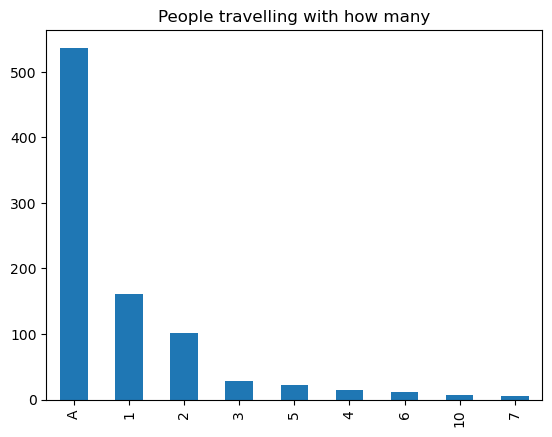

In [114]:
fig = df['number'].value_counts().plot(kind = 'bar')
#plt.title("People travelling with how many") # this line is also correct
fig.set_title("People travelling with how many")

### Handling mixed variables

In [115]:
# for number column
df['number_nums'] = pd.to_numeric(df['number'], errors = 'coerce', downcast = 'integer')

C:\Users\dell\AppData\Local\Temp\ipykernel_20200\436623278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_nums'] = pd.to_numeric(df['number'], errors = 'coerce', downcast = 'integer')


In [116]:
df

,Cabin,Ticket,Survived,number,number_nums
0,NaN,A/5 21171,0,1,1.0
1,C85,PC 17599,1,1,1.0
2,NaN,STON/O2. 3101282,1,A,NaN
3,C123,113803,1,1,1.0
4,NaN,373450,0,A,NaN
...,...,...,...,...,...
886,NaN,211536,0,A,NaN
887,B42,112053,1,A,NaN
888,NaN,W./C. 6607,0,3,3.0
889,C148,111369,1,A,NaN


In [117]:
np.where?

In [118]:
# its like a ternary statement in cpp - np.where()
df['number_str'] = np.where(df['number_nums'].isnull(), df['number'], np.nan)

C:\Users\dell\AppData\Local\Temp\ipykernel_20200\3784131934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_str'] = np.where(df['number_nums'].isnull(), df['number'], np.nan)


In [119]:
df

,Cabin,Ticket,Survived,number,number_nums,number_str
0,NaN,A/5 21171,0,1,1.0,NaN
1,C85,PC 17599,1,1,1.0,NaN
2,NaN,STON/O2. 3101282,1,A,NaN,A
3,C123,113803,1,1,1.0,NaN
4,NaN,373450,0,A,NaN,A
...,...,...,...,...,...,...
886,NaN,211536,0,A,NaN,A
887,B42,112053,1,A,NaN,A
888,NaN,W./C. 6607,0,3,3.0,NaN
889,C148,111369,1,A,NaN,A


In [120]:
# now dealing with cabin and ticket columns

In [121]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [122]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Capture groups in regular expressions are used to capture parts of the matching text. They are defined using parentheses () around the part of the pattern that you want to extract. When the regular expression matches, the part of the text that matches the pattern inside the parentheses is captured and can be retrieved.

In pandas, the str.extract method uses capture groups to extract matching text from strings in a Series.

In [123]:
df['Cabin_numbers'] = df['Cabin'].str.extract('(\d+)')
df['Cabin_floors'] = df['Cabin'].str[0]

C:\Users\dell\AppData\Local\Temp\ipykernel_20200\2587200250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_numbers'] = df['Cabin'].str.extract('(\d+)')
C:\Users\dell\AppData\Local\Temp\ipykernel_20200\2587200250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cabin_floors'] = df['Cabin'].str[0]


In [124]:
df

,Cabin,Ticket,Survived,number,number_nums,number_str,Cabin_numbers,Cabin_floors
0,NaN,A/5 21171,0,1,1.0,NaN,NaN,NaN
1,C85,PC 17599,1,1,1.0,NaN,85,C
2,NaN,STON/O2. 3101282,1,A,NaN,A,NaN,NaN
3,C123,113803,1,1,1.0,NaN,123,C
4,NaN,373450,0,A,NaN,A,NaN,NaN
...,...,...,...,...,...,...,...,...
886,NaN,211536,0,A,NaN,A,NaN,NaN
887,B42,112053,1,A,NaN,A,42,B
888,NaN,W./C. 6607,0,3,3.0,NaN,NaN,NaN
889,C148,111369,1,A,NaN,A,148,C


In [125]:
df['ticket_id'] = df['Ticket'].apply(lambda x : x.split()[0])
df['ticket_id'] = np.where(df['ticket_id'].str.isdigit(), np.nan, df['ticket_id'])

C:\Users\dell\AppData\Local\Temp\ipykernel_20200\3483051666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ticket_id'] = df['Ticket'].apply(lambda x : x.split()[0])
C:\Users\dell\AppData\Local\Temp\ipykernel_20200\3483051666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ticket_id'] = np.where(df['ticket_id'].str.isdigit(), np.nan, df['ticket_id'])


In [126]:
df['ticket_id'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [127]:
df

,Cabin,Ticket,Survived,number,number_nums,number_str,Cabin_numbers,Cabin_floors,ticket_id
0,NaN,A/5 21171,0,1,1.0,NaN,NaN,NaN,A/5
1,C85,PC 17599,1,1,1.0,NaN,85,C,PC
2,NaN,STON/O2. 3101282,1,A,NaN,A,NaN,NaN,STON/O2.
3,C123,113803,1,1,1.0,NaN,123,C,NaN
4,NaN,373450,0,A,NaN,A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
886,NaN,211536,0,A,NaN,A,NaN,NaN,NaN
887,B42,112053,1,A,NaN,A,42,B,NaN
888,NaN,W./C. 6607,0,3,3.0,NaN,NaN,NaN,W./C.
889,C148,111369,1,A,NaN,A,148,C,NaN


In [134]:
df['Ticket'].apply(lambda x: x.split())


0             [A/5, 21171]
1              [PC, 17599]
2      [STON/O2., 3101282]
3                 [113803]
4                 [373450]
              ...         
886               [211536]
887               [112053]
888          [W./C., 6607]
889               [111369]
890               [370376]
Name: Ticket, Length: 891, dtype: object

In [137]:
# giving -1 not 1 becoz some lists have only 1 element
# i.e. the no not the id part, can see above cell 
df['ticket_no'] = df['Ticket'].apply(lambda x: x.split()[-1]) 
df['ticket_no'] = pd.to_numeric(df['ticket_no'], errors = 'coerce')

C:\Users\dell\AppData\Local\Temp\ipykernel_20200\988920377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ticket_no'] = df['Ticket'].apply(lambda x: x.split()[-1])
C:\Users\dell\AppData\Local\Temp\ipykernel_20200\988920377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ticket_no'] = pd.to_numeric(df['ticket_no'], errors = 'coerce')


In [138]:
df

,Cabin,Ticket,Survived,number,number_nums,number_str,Cabin_numbers,Cabin_floors,ticket_id,ticket_no
0,NaN,A/5 21171,0,1,1.0,NaN,NaN,NaN,A/5,21171.0
1,C85,PC 17599,1,1,1.0,NaN,85,C,PC,17599.0
2,NaN,STON/O2. 3101282,1,A,NaN,A,NaN,NaN,STON/O2.,3101282.0
3,C123,113803,1,1,1.0,NaN,123,C,NaN,113803.0
4,NaN,373450,0,A,NaN,A,NaN,NaN,NaN,373450.0
...,...,...,...,...,...,...,...,...,...,...
886,NaN,211536,0,A,NaN,A,NaN,NaN,NaN,211536.0
887,B42,112053,1,A,NaN,A,42,B,NaN,112053.0
888,NaN,W./C. 6607,0,3,3.0,NaN,NaN,NaN,W./C.,6607.0
889,C148,111369,1,A,NaN,A,148,C,NaN,111369.0


<AxesSubplot:>

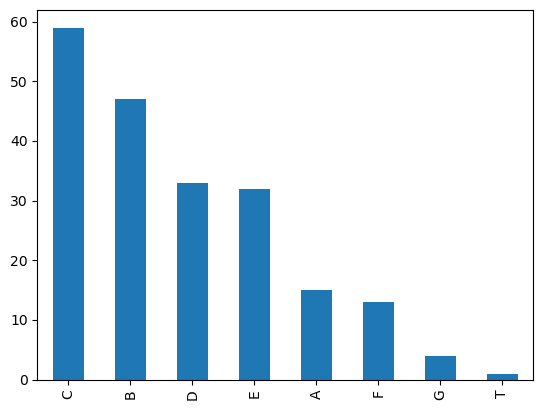

In [142]:
df['Cabin_floors'].value_counts().plot(kind = 'bar')

In [140]:
# Thanks !